In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("/content/Clustering_Mall_Customers.csv")


In [ ]:
df.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [ ]:
df.isnull()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.dtypes

,0
CustomerID,int64
Genre,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

le=LabelEncoder()
df['Genre']=le.fit_transform(df['Genre'])
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler=StandardScaler()
df[numerical_cols]=scaler.fit_transform(df[numerical_cols])

In [ ]:
df.dtypes

,0
CustomerID,float64
Genre,int64
Age,float64
Annual Income (k$),float64
Spending Score (1-100),float64


In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1,-1.424569,-1.738999,-0.434801
1,-1.706091,1,-1.281035,-1.738999,1.195704
2,-1.688771,0,-1.352802,-1.700830,-1.715913
3,-1.671450,0,-1.137502,-1.700830,1.040418
4,-1.654129,0,-0.563369,-1.662660,-0.395980


In [ ]:
df = df.drop('CustomerID', axis=1)


In [ ]:
df.dtypes

,0
Genre,int64
Age,float64
Annual Income (k$),float64
Spending Score (1-100),float64


In [ ]:
df.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [ ]:
df.drop(['Genre','Age'],axis=1)

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


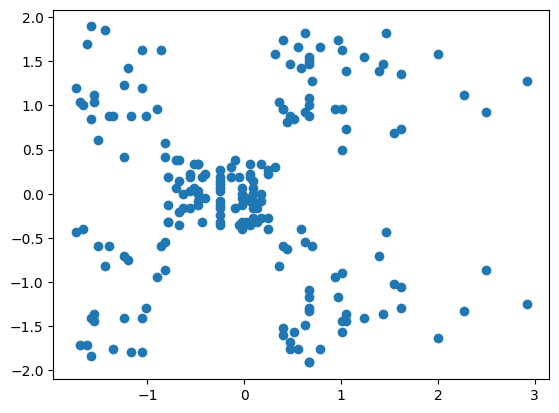

In [ ]:
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'])

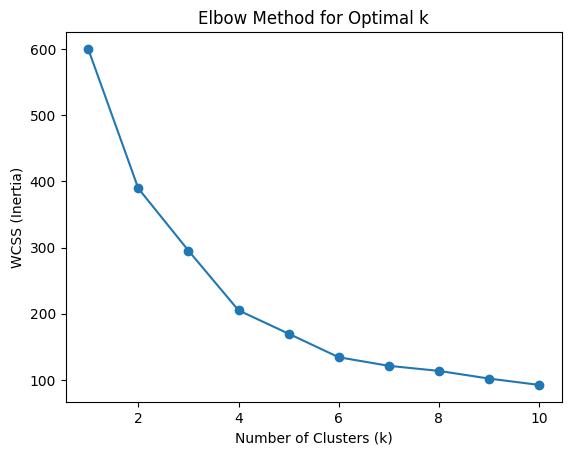

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []  # Within-Cluster Sum of Squares

# Try different values of k (number of clusters)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numerical_cols])
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

# Plot the Elbow Graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.show()


In [ ]:
kmeans=KMeans(n_clusters=5,random_state=42)
y_kmeans=kmeans.fit_predict(df[numerical_cols])

from sklearn.metrics import silhouette_score
print(silhouette_score(df[numerical_cols],y_kmeans))

0.40846873777345605


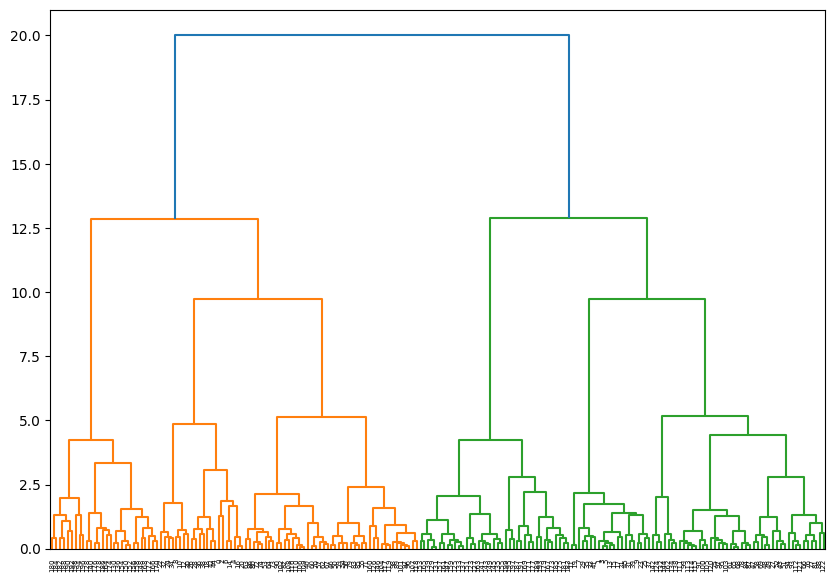

In [ ]:

from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage

linked=linkage(df[numerical_cols],method='ward')
plt.figure(figsize=(10,7))
dendrogram(linked)
plt.show()

In [ ]:
agglo = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_agglo = agglo.fit_predict(X)

# Silhouette Score
print("Hierarchical Silhouette Score:", silhouette_score(X, y_agglo))


Hierarchical Silhouette Score: 0.5538089226688662


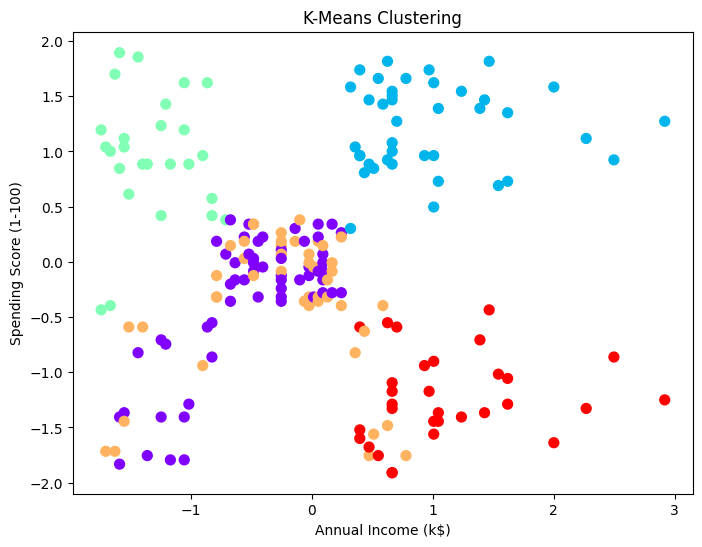

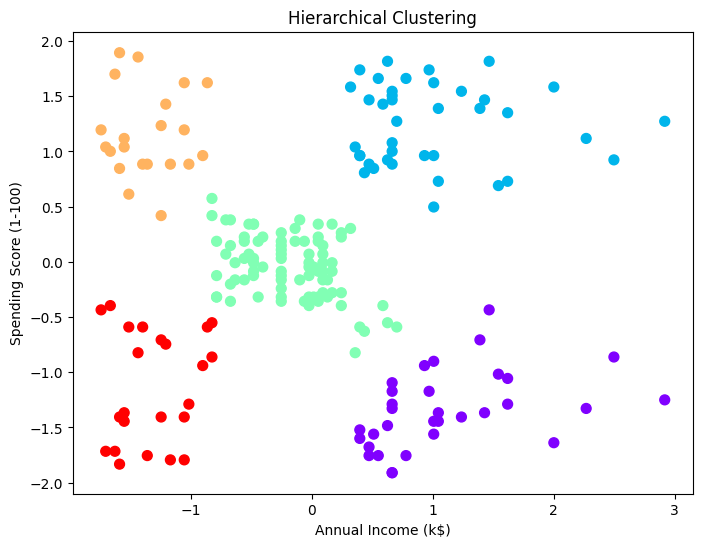

In [ ]:
# K-Means
plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=y_kmeans, cmap='rainbow', s=50)
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Hierarchical
plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=y_agglo, cmap='rainbow', s=50)
plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
